In [131]:
import pandas as pd
import numpy as ny
from sklearn import preprocessing
import matplotlib as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [132]:
df = pd.read_csv("company.csv")
data = df.dropna()
data.shape

(93, 6)

In [133]:
import pandas_profiling
pandas_profiling.ProfileReport(data)
#conda install -c anaconda pandas-profiling
#pip install pandas-profiling

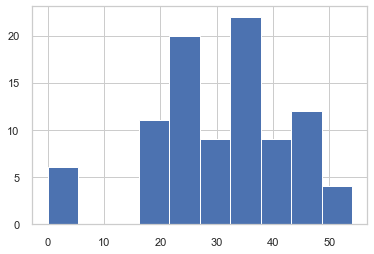

In [134]:
data.Age.hist()

In [135]:
data[data["Age"]<15]["Age"].count()

6

In [136]:
data.Country.value_counts()

India    93
Name: Country, dtype: int64

In [137]:
import warnings
warnings.filterwarnings("ignore")
data["Age"].replace({0.0:sum(data["Age"])/(data.shape[0]-data[data["Age"]<15]["Age"].count())},inplace=True)

In [138]:
data.Age.value_counts()

22.000000    11
33.000000     9
44.000000     7
23.000000     7
21.000000     7
32.356322     6
34.000000     6
32.000000     5
35.000000     4
41.000000     3
31.000000     3
40.000000     3
45.000000     3
37.000000     2
50.000000     2
43.000000     2
46.000000     2
20.000000     1
24.000000     1
17.000000     1
30.000000     1
19.000000     1
18.000000     1
38.000000     1
36.000000     1
54.000000     1
51.000000     1
26.000000     1
Name: Age, dtype: int64

In [139]:
data.Company.value_counts()

TCS                          34
Infosys                      31
CTS                          23
Congnizant                    2
Infosys Pvt Lmt               2
Tata Consultancy Services     1
Name: Company, dtype: int64

In [140]:
data.Company.replace({"Infosys Pvt Lmt":"Infosys","Tata Consultancy Services":"TCS","Congnizant":"CTS"},inplace=True)

In [141]:
data.Company.value_counts()

TCS        35
Infosys    33
CTS        25
Name: Company, dtype: int64

In [142]:
df.Gender.value_counts()

0    115
1     33
Name: Gender, dtype: int64

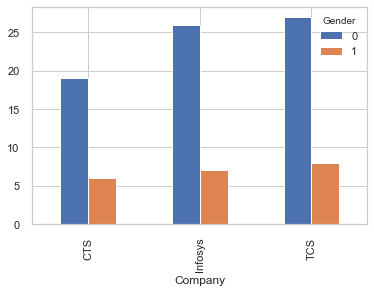

In [145]:
%matplotlib inline
pd.crosstab(data.Company,data.Gender).plot(kind="bar")
#plt.title("Gender prediction by Company")

In [ ]:
#%matplotlib inline 
pd.crosstab(data.Salary,data.Gender).plot(kind="bar")
#plt.title("Gender predcition by Salary") ## shows error 

In [ ]:
pd.crosstab(data.Place,data.Gender).plot(kind="bar")

In [ ]:
data.columns

In [ ]:
df_cat = pd.get_dummies(data.filter(['Company','Place'],axis=1))

In [ ]:
df_cat.head()

In [ ]:
df_X = pd.concat([df_cat,data.filter(['Age', 'Salary'],axis=1)],axis=1)

In [ ]:
df_X.columns

In [ ]:
df_Y = data[["Gender"]]

In [ ]:
df_Y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
train_Pred = logreg.predict(X_train)

In [ ]:
metrics.confusion_matrix(y_train,train_Pred)

In [ ]:
(49+11)/(49+2+3+11)

In [ ]:
metrics.accuracy_score(y_train,train_Pred) # TP+TN / Everything 

In [ ]:
test_Pred = logreg.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,test_Pred)

In [ ]:
metrics.accuracy_score(y_test,test_Pred)

In [ ]:
Predicting the test set results and caculating the accuracy
Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_Pred))

In [ ]:
%matplotlib inline

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#/*plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()*/

TypeError: 'module' object is not callable

In [ ]:
print(fpr, tpr, thresholds)